In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def logistic_regression_loss(Lambda, beta, train, y):
    pi = 1/(1 + np.exp(- np.sum(train * beta, axis = 1)))
    epsilon = 0.001
    res = - np.sum(y * np.log(pi + epsilon) + (1 - y) * np.log(1 - pi + epsilon)) + Lambda * np.sum(np.square(beta))
    return res

In [3]:
def logistic_regression_loss_gradient(Lambda, beta, train, y):
    pi = 1/(1 + np.exp(- np.sum(train * beta, axis = 1)))
    res = np.sum((train.T * (pi - y)).T, axis = 0) + 2 * Lambda * beta
    return res

In [4]:
def logistic_regression_loss_Hessian_inverse(Lambda, beta, train, y):
    pi = 1/(1 + np.exp(- np.sum(train * beta, axis = 1)))
    epsilon = 0.001
    res = train.T @ (np.diag((pi + epsilon) * (1 - pi + epsilon)) @ train) + 2 * Lambda * np.eye(beta.shape[0])
    res = np.linalg.inv(res)
    return res

In [5]:
def Newton_method(Lambda, beta, train, y):
    x0 = beta
    x1 = x0 - logistic_regression_loss_Hessian_inverse(Lambda, x0, train, y) @ (logistic_regression_loss_gradient(Lambda, x0, train, y))
    history = [x0, x1]
    niter = 0
    
    while np.sum(np.square(logistic_regression_loss(Lambda, history[-1], train, y) - logistic_regression_loss(Lambda, history[-2], train, y))) > 0.01 and niter < 100:
        xn = history[len(history) - 1]
        xnp1 = xn - logistic_regression_loss_Hessian_inverse(Lambda, xn, train, y) @ (logistic_regression_loss_gradient(Lambda, xn, train, y))
        # xnp1 = xn - logistic_regression_loss(Lambda, xn, train, y)/(logistic_regression_loss_gradient(Lambda, xn, train, y) + epsilon)
        # xnp1 = xn - (logistic_regression_loss_gradient(Lambda, xn, train, y) + epsilon) # gradient descent
        history.append(xnp1)
        niter += 1
    
    return history[len(history) - 1]

In [6]:
with open('lambda.txt', 'r') as file:
    Lambda = []
    for line in file:
        line = float(line.strip())
        Lambda.append(line)

beta0 = np.ones(20, dtype = 'float64')

with open('train.txt', 'r') as file:
    train = []
    first = True
    for line in file:
        line = line.strip().split('\t')
        if first != True:
            for i in range(len(line)):
                line[i] = float(line[i])
            train.append(line)
        first = False
train = np.array(train, dtype = 'float64')
y = train[:, 0]
train = train[:, 1:]

In [7]:
beta_history = [beta0]

for L in Lambda:
    beta = Newton_method(L, beta_history[len(beta_history) - 1], train, y)
    beta_history.append(beta)
    print('Lambda = {}:\n beta = {}\n\n'.format(L, beta))

Lambda = 10000000000.0:
 beta = [ 3.72236133e-09  6.12520724e-10 -6.44585245e-09 -6.43161647e-10
 -1.97989859e-11 -1.66453153e-09 -3.12113392e-09  7.76443231e-10
 -1.89594344e-09  8.41879081e-09 -1.19695036e-10  9.68848915e-09
 -6.85117719e-10 -1.99747719e-09 -1.19004147e-09  3.54246945e-09
 -3.76216761e-09  6.78636652e-11  6.10779786e-10 -4.63232316e-09]


Lambda = 3906939937.05462:
 beta = [ 9.52755997e-09  1.56777627e-09 -1.64984629e-08 -1.64620111e-09
 -5.06761806e-11 -4.26044646e-09 -7.98869177e-09  1.98734419e-09
 -4.85275506e-09  2.15482931e-08 -3.06365818e-10  2.47981459e-08
 -1.75359015e-09 -5.11263773e-09 -3.04596833e-09  9.06711752e-09
 -9.62944622e-09  1.73701823e-10  1.56331947e-09 -1.18566504e-08]


Lambda = 1526417967.17524:
 beta = [ 2.43862316e-08  4.01279925e-09 -4.22285719e-08 -4.21351796e-09
 -1.29706388e-10 -1.09048054e-08 -2.04474389e-08  5.08670619e-09
 -1.24208394e-08  5.51538529e-08 -7.84162236e-10  6.34720007e-08
 -4.48838839e-09 -1.30860358e-08 -7.79630302e-0

In [8]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR(penalty = 'l2')
lr.fit(train, y)
lr.coef_

array([[ 0.04769221,  0.02299676, -0.07086348,  0.02294333,  0.01728589,
        -0.02426944, -0.08778041,  0.0330495 , -0.0033905 ,  0.12014872,
        -0.03093034,  0.14691661,  0.00614349, -0.02085116, -0.06927315,
         0.04238492, -0.06726023,  0.04385593, -0.01211081, -0.09895873]])

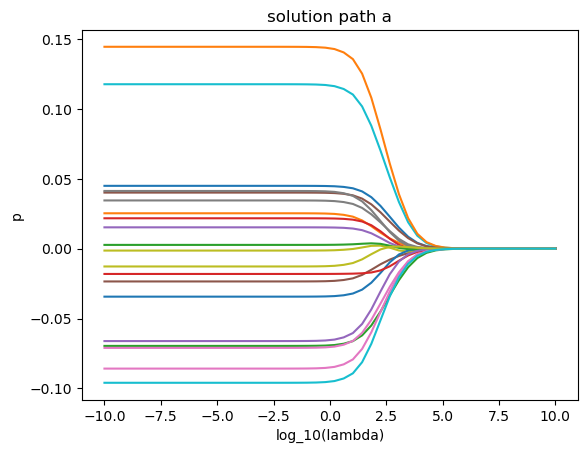

In [9]:
for i in range(len(beta_history[0])):
    plt.plot(np.log10(np.array(Lambda)), np.array(beta_history)[1:, i])

plt.title('solution path a')
plt.ylabel('p') 
plt.xlabel('log_10(lambda)') 
plt.show()

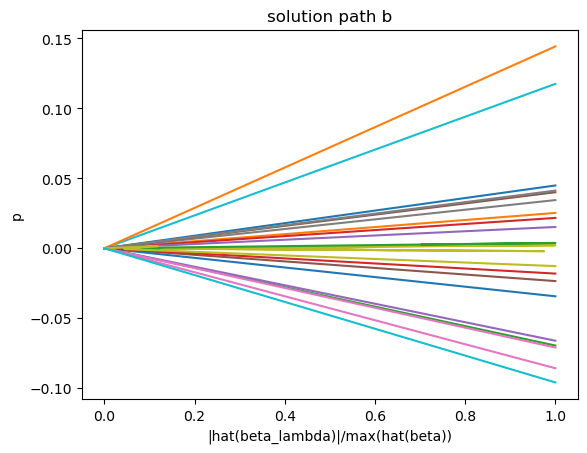

In [10]:
for i in range(len(beta_history[0])):
    plt.plot(np.abs(np.array(beta_history)[1:, i]) / np.max(np.abs(np.array(beta_history)[1:, i])), np.array(beta_history)[1:, i])

plt.title('solution path b')
plt.ylabel('p') 
plt.xlabel('|hat(beta_lambda)|/max(hat(beta))') 
plt.show()

In [11]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
print(kf)
splits = kf.split(train)
for i, (train_index, test_index) in enumerate(splits):
    print(f"Fold {i}:")
    print(f"Train: index={train_index}")
    print(f"Test: index={test_index}")

KFold(n_splits=10, random_state=42, shuffle=True)
Fold 0:
Train: index=[ 1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 46 47 48 49 50 51 52 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 71 72 73 74 75 76 77 78 79
 81 82 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
Test: index=[ 0 10 22 39 44 45 53 70 80 83]
Fold 1:
Train: index=[ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 19 20 21 22 23 24 25 26
 27 28 29 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 74 75 78 79 80
 81 82 83 84 85 86 87 88 89 91 92 93 94 95 96 97 98 99]
Test: index=[ 4 12 18 30 31 33 73 76 77 90]
Fold 2:
Train: index=[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 27 28 29 30 31 32 33 34 35 36 37 38 39 41 43 44 45 46 47 48 49 50 51 52
 53 54 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 73 74 75 76 77 78 79
 80 81 82 83 84 85 86 87 89 90

In [12]:
from sklearn.model_selection import KFold

beta_history = {}
hat_L_lambda = np.empty((10, 50), dtype = 'float64')

kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
splits = kf.split(train)

for i, (train_index, test_index) in enumerate(splits):
    beta_history[i] = [beta0]

    for L in range(len(Lambda)):
        beta = Newton_method(Lambda[L], beta_history[i][len(beta_history[i]) - 1], train[train_index], y[train_index])
        beta_history[i].append(beta)
        
        hat_pi_minusk = 1/(1 + np.exp(- np.sum(train[test_index] * beta, axis = 1)))
        epsilon = 0.001
        hat_L_lambda[i][L] = np.sum(y[test_index] * np.log(hat_pi_minusk + epsilon) + (1 - y[test_index]) * np.log(1 - hat_pi_minusk + epsilon))

In [13]:
print(np.mean(hat_L_lambda, axis = 0))

[-6.91149151 -6.9114911  -6.91149003 -6.9114873  -6.91148031 -6.91146243
 -6.91141666 -6.91129953 -6.91099984 -6.9102335  -6.90827671 -6.90329884
 -6.89075497 -6.85988284 -6.78814101 -6.64150335 -6.40709824 -6.15246201
 -6.00853847 -6.07599051 -6.34951096 -6.69924509 -6.97866972 -7.12826402
 -7.20498022 -7.24045737 -7.25475235 -7.26034336 -7.26252417 -7.26337542
 -7.26370786 -7.26383773 -7.26388846 -7.26390829 -7.26391603 -7.26391906
 -7.26392024 -7.2639207  -7.26392088 -7.26392095 -7.26392098 -7.26392099
 -7.26392099 -7.26392099 -7.263921   -7.263921   -7.263921   -7.263921
 -7.263921   -7.263921  ]


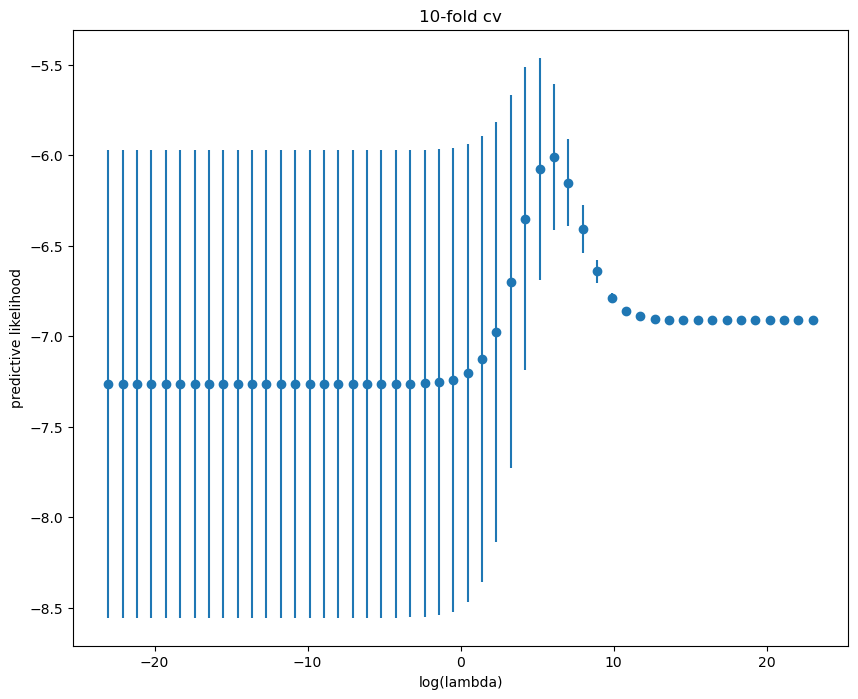

In [14]:
plt.figure(figsize=(10, 8))
plt.errorbar(np.log(np.array(Lambda)), np.mean(hat_L_lambda, axis = 0), yerr = np.std(hat_L_lambda, axis = 0)/np.sqrt(10), fmt = 'o')

plt.title('10-fold cv')
plt.ylabel('predictive likelihood') 
plt.xlabel('log(lambda)') 
plt.show()